In [31]:
# Real or not - https://www.kaggle.com/c/nlp-getting-started/data
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 11.1 MB 513 kB/s eta 0:00:01    |████████▎                       | 2.9 MB 142 kB/s eta 0:00:58
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074433 sha256=7ac84632e7991a79a49729828a84c60eae136e53821b5f445b92aadaf0ba504d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d3kvh0dj/wheels/59/4f/8c/0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
You should consider upgrading via the '/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [104]:
import pandas as pd
import numpy as np
import re

In [14]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [15]:
df_train = df_train.drop(['id', 'keyword', 'location'], axis=1)
df_test = df_test.drop(['keyword', 'location'], axis=1)

In [16]:
df_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


# Clean the train_df and test_df

In [17]:
# Rename the URLS as URL
df_train['text'] = df_train['text'].apply(lambda x : re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL", x))
df_test['text'] = df_test['text'].apply(lambda x : re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL", x))

In [63]:
# Remove the stop words
from tqdm import tqdm
import string

from spacy.lang.en.stop_words import STOP_WORDS
spacy_sm_model = spacy.load('en_core_web_sm')

def remove_stopwords(dirty_text):
    my_doc = spacy_sm_model(dirty_text)
    new_tokens = []
    for token in my_doc:
#         print(token)
        if token.is_stop:
            continue
        if str(token) in string.punctuation:
            continue
        new_tokens.append(str(token))
    cleaned_text = " ".join(new_tokens)
    
    return cleaned_text
#     return "lol"

df_train["cleaned_text"] = df_train["text"].apply(lambda x : remove_stopwords(x))
df_test["cleaned_text"] = df_test["text"].apply(lambda x : remove_stopwords(x))
df_test

,text,cleaned_text
0,Just happened a terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing street save
3,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 China Taiwan
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...,Storm RI worse hurricane city&amp;3others hard...
3260,Green Line derailment in Chicago URL,Green Line derailment Chicago URL
3261,MEG issues Hazardous Weather Outlook (HWO) URL,MEG issues Hazardous Weather Outlook HWO URL


In [65]:
df_train

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,Deeds Reason earthquake ALLAH Forgive
1,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfires evacuation ord..."
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo Ruby Alaska smoke wildfires pou...
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,giant cranes holding bridge collapse nearby ho...
7609,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest control wild fires C...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. URL,1,M1.94 01:04 UTC]?5 km S Volcano Hawaii URL
7611,Police investigating after an e-bike collided ...,1,Police investigating e bike collided car Littl...


# Create a spacy textcat classifier

In [66]:
import spacy

In [67]:
nlp = spacy.blank("en")

In [68]:
# Create a text categorizer pipe and add it to the nlp pipeline
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe("textcat")
    nlp.add_pipe(textcat) 

In [69]:
nlp.pipe_names

['textcat']

In [70]:
# Add labels 
textcat.add_label("POSITIVE")
# textcat.add_label("NEGATIVE")
textcat.labels

('POSITIVE',)

In [71]:
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
other_pipes

[]

Convert the data to POSITIVE and NEGATIVE

In [72]:
# df_train.target = df_train.target.replace({1 : "POSITIVE", 0: "NEGATIVE"})
# df_train

In [73]:
# train_texts = df_train.cleaned_text.to_list()
train_cats = df_train.target.to_list()
train_cats = [{'POSITIVE': bool(y)} for y in train_cats]
train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))
# train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))
# train_data

In [81]:
import random
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import clear_output

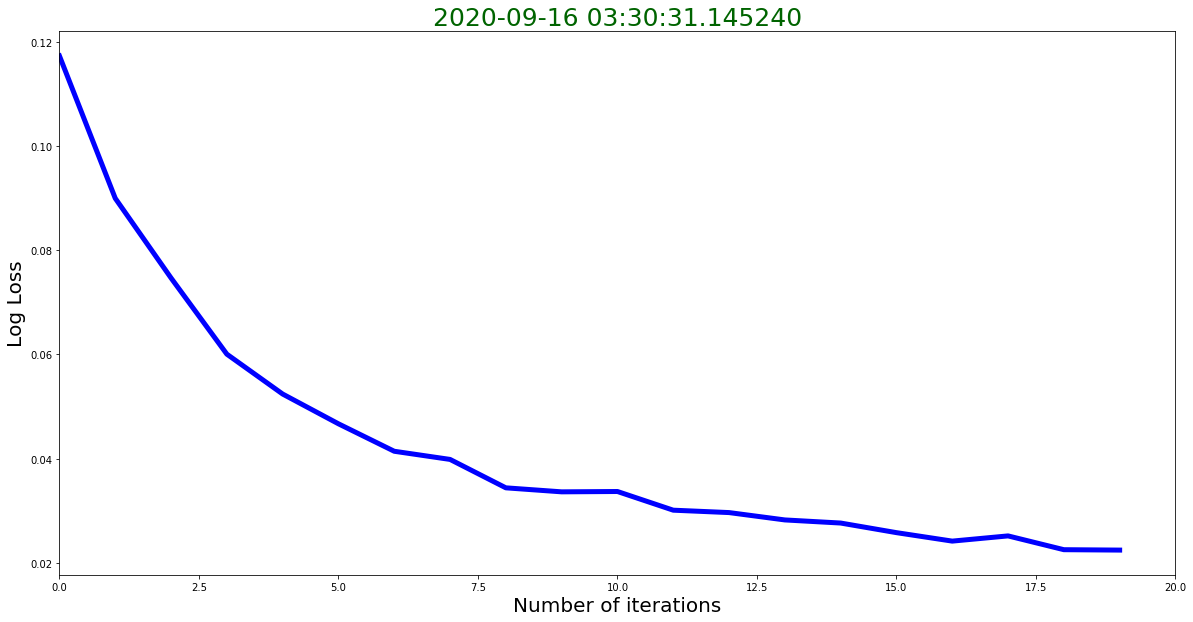

{'textcat': 0.022430871878142966}


In [83]:
with nlp.disable_pipes():
    optimizer = nlp.begin_training()
    loss_data = []
    for i in range(20):
        random.shuffle(train_data)
        losses = {}
        for batch in spacy.util.minibatch(train_data, size=20):
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop = 0.2, losses=losses)
        loss_data.append(losses['textcat'])
        fig = plt.figure(figsize = (20, 10))
        ax = fig.add_subplot(111)
        ax.set_title(datetime.today(), fontsize = 25, color = 'darkgreen')
        ax.plot(np.arange(i + 1), loss_data, linewidth = 5, color = 'blue')
        ax.set_xlim([0, 20])
        ax.set_xlabel("Number of iterations", fontsize = 20)
        ax.set_ylabel("Log Loss", fontsize = 20)
        clear_output()
        plt.show()
        print(losses)

In [97]:
text = "Accident in #Ashville on US 23 SB before SR 752 #traffic http://t.co/hylMo0WgFI"
nlp("").cats

IndexError: Out of bounds on buffer access (axis 0)

In [102]:
# df_test.isna().sum()
df_test.to_csv("df_test.csv")

In [101]:
df_test['cleaned_text'].apply(lambda text: 1 if nlp(text).cats['POSITIVE'] > 0.5 else 0)

IndexError: Out of bounds on buffer access (axis 0)

In [103]:
# df_test = pd.read_csv("test.csv")
# df_test = df_test.drop(['keyword', 'location'], axis=1)
df_test['target'] = df_test['cleaned_text'].apply(lambda text: 1 if text != "" and nlp(text).cats['POSITIVE'] > 0.5 else 0)
# df_test = df_test.drop(['text'], axis=1)
df_test.to_csv("result.csv")
df_test

,text,cleaned_text,target
0,Just happened a terrible car crash,happened terrible car crash,1
1,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe,0
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing street save,1
3,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 China Taiwan,1
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,Storm in RI worse than last hurricane. My city...,Storm RI worse hurricane city&amp;3others hard...,1
3260,Green Line derailment in Chicago URL,Green Line derailment Chicago URL,1
3261,MEG issues Hazardous Weather Outlook (HWO) URL,MEG issues Hazardous Weather Outlook HWO URL,1
